In [26]:
class Dplot3D:
    """
    
    """
    def __init__(self, _range =20, fig_size=(20,20),elev=10,azim=10,mesh_const=0.1,**kwargs):
        self.fig_size = fig_size
        self.fig = plt.figure()
        self.fig = plt.figure(figsize=fig_size)
        self.ax = self.fig.gca(projection='3d')
       
        #self.ax = fig.add_subplot(111, projection='3d')
        #self.ax.set_aspect("equal")
        self.ax.set_xlabel('X',fontsize=30)
        #self.ax.view_init(elev=elev, azim=azim)
        self.ax.set_ylabel('Y',fontsize=30)
        self.ax.set_zlabel('Z',fontsize=30)
        self.range=_range
        self.mesh = mesh_const
        #plt.xlabel('$\textbf{time} (s)$')
        
    def init_cordinates(self,xlimt=10,ylimt=10,zlimt=10):
        """
        
        """
        #self.ax.quiver(0, 0, 0, 0, 1, 0,arrow_length_ratio=50)
        #self.ax.quiver(0, 0, 0, 1, 0, 0,arrow_length_ratio=50)
        #self.ax.quiver(0, 0, 0, 0, 0,1,arrow_length_ratio=50)
        self.ax.set_xlim([-xlimt, xlimt])
        self.ax.set_ylim([-ylimt, ylimt])
        self.ax.set_zlim([-zlimt, zlimt])
       
        
        
        
    def _calculate_funct(self,func):
        x, y = np.mgrid[-self.range:self.range:self.mesh,-self.range:self.range:self.mesh]
        return  x,y,func(x,y)

        
    def append_funct(self,function,color='b',label=''):
        x,y,z = self._calculate_funct(function)
        self.ax.plot_wireframe(x, y, z,color=color,label=label,rstride=15, cstride=5)
   
    def append_curve(self,x_funct, y_funct, z_funct,_range=5,color='y',label='',linewidth=1.0):
        """
        x= 2+k*2
        y = 3+k*4
        z = 5 + k*4
        """
        
        k = np.linspace(-_range,_range,100)
        x = x_funct(k)
        y = y_funct(k)
        z = z_funct(k)
        if type(z)==int:
            z=np.ones(len(x))*z
        self.ax.plot(x, y, z,color=color,label=label,linewidth=linewidth)    
            
    def append_circle_xy(self,r,z=0,color='b'):
        theta = np.linspace(0, 2 * np.pi, 100)
        x = r * np.sin(theta)
        y = r * np.cos(theta)
        z = np.ones(len(x))*z
        self.ax.plot(x, y, z, color = color)
       
    def plot_plane(self,z):
        pass
    
    def append_vector(self,x, y, z, dx, dy, dz):
        self.ax.quiver(x, y, z, dx, dy, dz,color='r') #
        
    def show(self):
        plt.legend()
        plt.show()
   


In [4]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
from mpl_toolkits import mplot3d



## Langrange multipliers

### The method L'mutilipliers is  a method for finding extrema of function of mutivaribles restricted to given subset


##### The Langrange is the method for finding the extrema of fucntion of multivariables restricted to given subset.  The method is an optimization problem of form:$$minimize_x f(\vec{r})$$ $$g(\vec{r})=0$$

##### The theorem is : the minum if f is found whent its gradient poin in the sane direction as gradient f.
In other words,when $$\nabla{f(\vec{r})}=\alpha\nabla{g(\vec{r})}$$


### Proof of theoreorem
#### let's to have 3D eucliadin space $|E^3$ and some fuction $f(x,y)=f(\vec{r})$ for example $$f=2*x^3 - 4*x^2 +10$$ $$and$$ $$g(x,y)=2*x-4*y=0$$  

<Figure size 432x288 with 0 Axes>

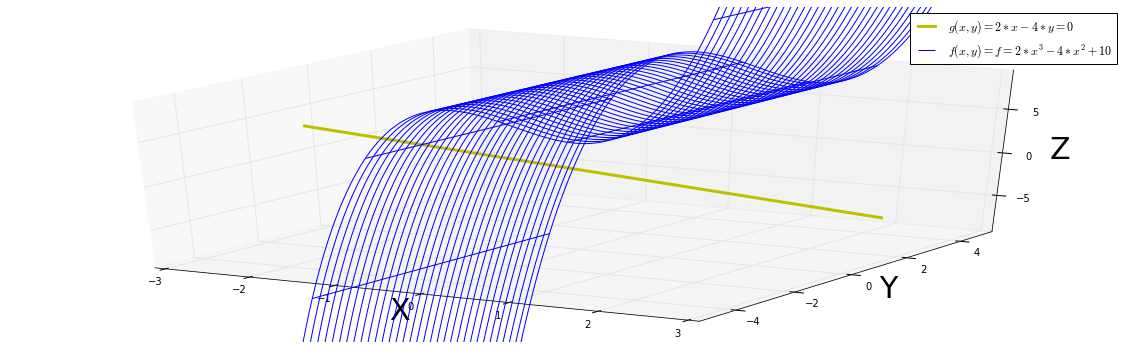

In [23]:
f = lambda x,y : 2*x**3 - 4*x**2 + 10
dplt=Dplot3D(_range=4,mesh_const=0.05,fig_size=(20,6))
dplt.append_funct(f,label=r'$f(x,y)=f=2*x^3 - 4*x^2 +10$')
dplt.append_curve(lambda k:2*k,lambda k:-k,lambda k:0,_range=2,label=r'$g(x,y)=2*x-4*y=0$',linewidth=3)
dplt.init_cordinates(xlimt=3,ylimt=5,zlimt=9)
dplt.show()

### 
#### we have $$1)f(x,y)=2*x^3 - 4*y^2 +10$$
#### $$and$$    $$2)  g(x,y)=2*x-4*y$$   equation 2) can be written as
####  $$3)  x(k) = 2*k  $$  and  $$4) y(k)=k$$ #### if we plug  the eqs.  3) and 4)  to eq .1) we get  $$f(x,y)=2*x^3 - 4*y^2  + 10 = $$  $$ 2*(2*k)^3 - 4*(k) +10 = f(k) $$ by constaint we gets from equation of 2 variable euation of one variable.Look like this  

<Figure size 432x288 with 0 Axes>

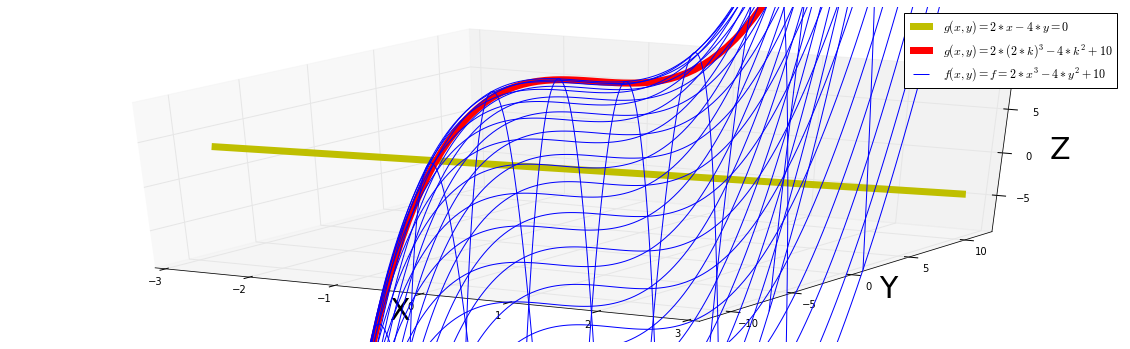

In [47]:
f = lambda x,y : 2*(x**3) - 4*(y**2) + 10
dplt=Dplot3D(_range=4,mesh_const=0.05,fig_size=(20,6))
dplt.append_funct(f,label=r'$f(x,y)=f=2*x^3 - 4*y^2 +10$')
dplt.append_curve(lambda k:2*k,lambda k:k,lambda k:0,_range=2,label=r'$g(x,y)=2*x-4*y=0$',linewidth=7)
dplt.append_curve(lambda k:2*k,lambda k:k,lambda k:2*((2*k)**3)-4*(k**2)+10,_range=2,color='r',label=r'$g(x,y)=2*(2*k)^3-4*k^2+10$',linewidth=7)
dplt.init_cordinates(xlimt=3,ylimt=12,zlimt=9)
dplt.show()

##### The red line is the our curve wich satify euation 1) and constaint 2) it is verry simple to find its extremum ,in which easy can be find extrema $$f'(k) = 0$$ and went we find for wich k f gets the min and max after that when k is plug into x(k) and y(k) wi wiil find x,y,but our purpose is to generelase the steps calculation : $$f(x(k),y(k))=2*(2*k)^3-4*k^2+10 $$ 
$$16*k^3-4*k*2+10$$ 
$$ f'(k) = 3*16*k^2 - 8*k $$ $$=>$$
$$ 48*k^2 - 8*k=>$$ 
$$ 8*k(6-k)=0=>$$ $$k = 0 $$
$$and $$
$$k=6 =>$$ 
$$x = 0,y=0 $$ 
$$and $$ 
$$x = 12 ,y = 6$$    


when k=0 f(k) = 10 and k=6 f(k) 

##### let's tp generaalise above considering
#### we have 1 ) f(x,y) and g(x,y) then we can write f(x,y)= f(x(k),f(y(k)) => 
$$1)\nabla{f(x,y)}=\frac{\partial{f}}{\partial{x}}*\frac{dx}{dk}+\frac{\partial{f}}{\partial{y}}*\frac{dy}{dk}=0$$
$$2)\nabla{g(x,y)}=\frac{\partial{g}}{\partial{x}}*\frac{dx}{dk}+\frac{\partial{g}}{\partial{y}}*\frac{dy}{dk}=0$$



from 1) 2) we can conclude that  $$\nabla{f(x,y)}\bot\frac{d\vec{r}}{dk}$$
$$\nabla{g(x,y)}\bot\frac{d\vec{r}}{dk}$$
$$=>$$
$$\nabla{f(x,y)}\parallel\nabla{f(x,y)}$$
why ? <br>
or linear dependend
we can proof this 
of two vectors are linear dependend this mean $$\vec{r_1} - a*\vec{r_2}=0$$
and where $$r_1= r_{11}e_1 + r_{12}e_2$$
$$r_2= r_{21}e_1 + r_{22}e_2$$
$$\begin{bmatrix} r_{11}  & r_{12}  \\ r_{21} & r_{22}   \end{bmatrix}*\begin{bmatrix} e_{1}   \\  e_{2}   \end{bmatrix}=\begin{bmatrix} 0   \\  0   \end{bmatrix}$$
$R*E=0$
from linear algebra this has trivial desionions when $r_{ii}=0$ and non triavial when $$\det{R}=0$$


$$\begin{bmatrix} \frac{\partial{f}}{\partial{x}}  & \frac{\partial{f}}{\partial{y}}  \\
\frac{\partial{g}}{\partial{x}} & \frac{\partial{g}}{\partial{y}}   \end{bmatrix}*
\begin{bmatrix} {\frac{dx}{dk}}   \\  \frac{dy}{dk}  \end{bmatrix}=\begin{bmatrix} 0   \\  0   \end{bmatrix}$$




## other proof is ,if two vecor $/vec{r_1}$ and $/vec{r_2}$ are linear depend this meant that dot product
$$\vec{r_1}*\vec{r_2}=|\vec{r_1}|*|\vec{r_2}|*cos(\alpha)=0$$
of course when $\alpha = 0$ the the both vector stands one same line or they are linear dependent or <br> $\vec{r_1}\parallel\vec{r_2}$ $and$
$\vec{r_2}\parallel\vec{r_3}==>\vec{r_1}\parallel\vec{r_3}$